## Early Stooping, Momentum Based, Nestrov Accelerated

+ **[1 - Btach Gradient decent With early stooping](#1---Btach-Gradient-decent-With-early-stooping)**
+ **[2 - Momentum Based Gradient Decent](#2---Momentum-Based-Gradient-Decent)**
+ **[3 - Nestrov Accelerated Gradient Decent](#3---Nestrov-Accelerated-Gradient-Decent)**

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,20)

In [3]:
y = -x + 2

#### Plot your data points. 

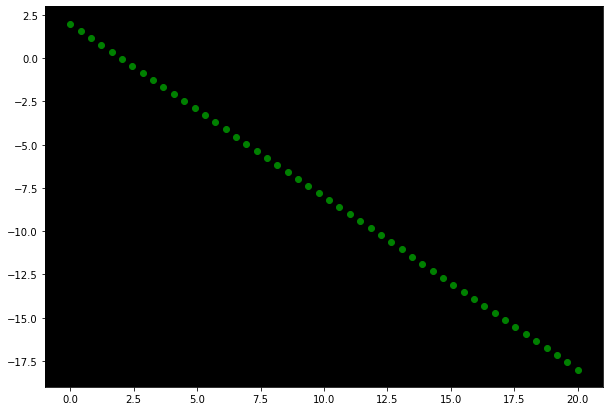

In [4]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y, c = "g")

# 1 - Btach Gradient decent With early stooping

In [5]:
def GradientDecentSingleNew(x, y, learningRate = .001, n_iter = 1000):
    lstCost = []
    lstTheta0 = []
    lstTheta1 = []
    lstPredicted_Data = []
    
    theta_0 = 0
    theta_1 = 0
    
    for i in range(n_iter):  
        predicted_data = theta_0 + theta_1 *x
        
        cost = 1/(2*len(x)) * sum((predicted_data -y)**2)
        
        grad_theta_0 = (1/len(x)) * sum(predicted_data - y)
        grad_theta_1 = (1/len(x)) * sum((predicted_data - y)*x)
        
        theta_0 = theta_0 - learningRate * grad_theta_0
        theta_1 = theta_1 - learningRate * grad_theta_1
        
        
        lstPredicted_Data.append(predicted_data)
        lstCost.append(cost)
        lstTheta0.append(theta_0)
        lstTheta1.append(theta_1)
        
        #Stopping criteria
        if i > 0 :
            if (np.linalg.norm([grad_theta_0,grad_theta_1]) < .0001):
                break
            elif(np.absolute((lstCost[i] -lstCost[i-1])) < .001):
                break
                
            elif(np.absolute(np.linalg.norm([lstTheta0[i],lstTheta1[i]]) - np.linalg.norm([lstTheta0[i-1],lstTheta1[i-1]])) < .0001):
                break
        

    return lstTheta0,lstTheta1 ,lstCost,lstPredicted_Data

In [6]:
lstTheta0,lstTheta1 ,lstCost,lstPredicted_Data = GradientDecentSingleNew(x,y,.00009,300)

In [7]:
from sklearn.metrics import r2_score
r2_score(y ,lstPredicted_Data[-1])

0.966589419332913

In [8]:
lstCost

[49.34693877551021,
 48.16450767224865,
 47.01072650892522,
 45.8849010915751,
 44.78635404669742,
 43.7144244136918,
 42.66846724717049,
 41.64785322890637,
 40.651968289183614,
 39.68021323732308,
 38.732003401160235,
 37.806768275258456,
 36.90395117764627,
 36.02300891487201,
 35.16341145517404,
 34.32464160957042,
 33.50619472067559,
 32.70757835905723,
 31.928312026950373,
 31.167926869150694,
 30.42596539091278,
 29.70198118268391,
 28.99553865150748,
 28.30621275893468,
 27.633588765286554,
 26.977261980112672,
 26.33683751869625,
 25.711930064459143,
 25.102163637123944,
 24.50717136649338,
 23.92659527171124,
 23.360086045871796,
 22.80730284584816,
 22.267913087213145,
 21.741592244129343,
 21.228023654087703,
 20.726898327377548,
 20.237914761173037,
 19.760778758124378,
 19.295203249344667,
 18.84090812168571,
 18.397620049199073,
 17.965072328680773,
 17.54300471920083,
 17.131163285521072,
 16.72930024530681,
 16.3371738200408,
 15.954548089549455,
 15.58119285005399,
 1

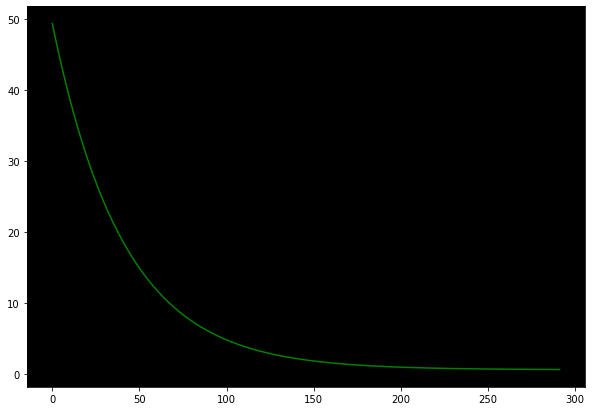

In [9]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstCost, c = "g")

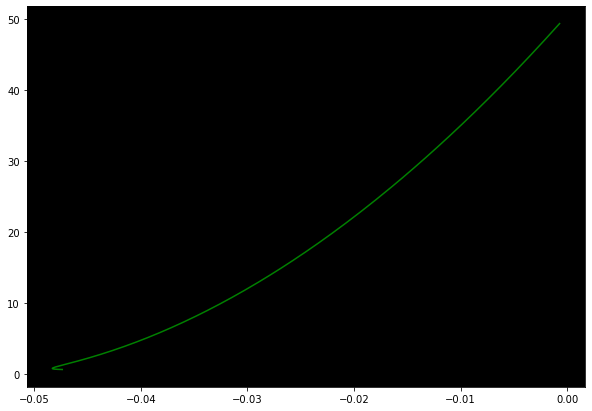

In [10]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta0,lstCost,c = "g")

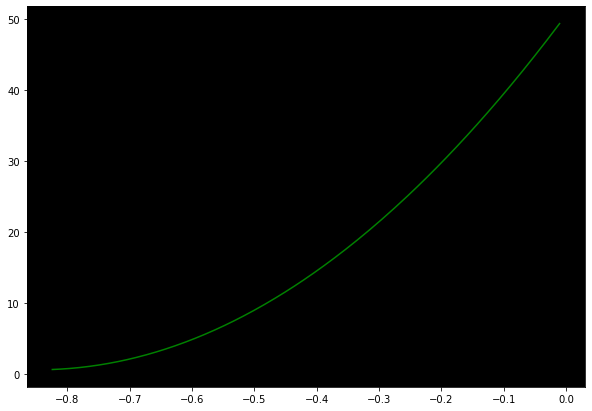

In [11]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta1,lstCost, c ="g")

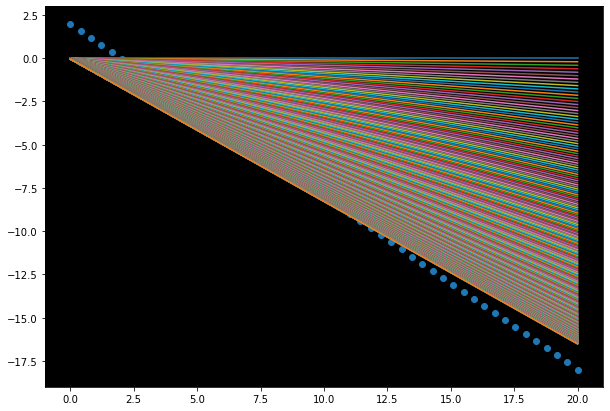

In [12]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)

for i in range(len(lstPredicted_Data)):
    plt.plot(x, lstPredicted_Data[i])

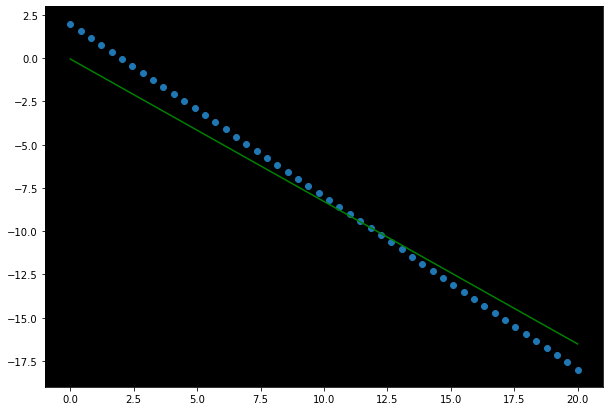

In [13]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)
plt.plot(x, lstPredicted_Data[-1], c = "g")

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

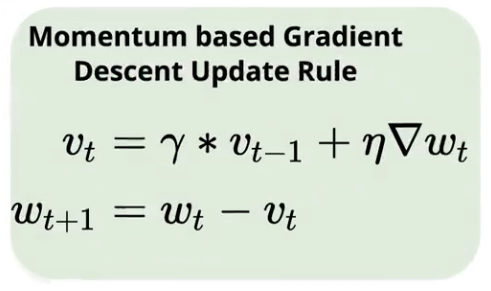

#### γ takes values between 0 and 1.
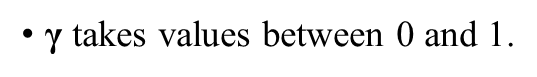

# 2 - Momentum Based Gradient Decent

In [14]:
def MomentumBasedGradientDecentSingleNew(x, y,mom =.01, learningRate = .001, n_iter = 1000):
    lstCost = []
    lstTheta0 = []
    lstTheta1 = []
    lstPredicted_Data = []
    
    theta_0 = 0
    theta_1 = 0
    vt0 = 0
    vt1 = 1
    
    for i in range(n_iter):  
        predicted_data = theta_0 + theta_1 *x
        
        cost = 1/(2*len(x)) * sum((predicted_data -y)**2)
        
        grad_theta_0 = (1/len(x)) * sum(predicted_data - y)
        grad_theta_1 = (1/len(x)) * sum((predicted_data - y)*x)
        
        vt0 = mom * vt0 + learningRate * grad_theta_0
        vt1 = mom * vt1 + learningRate * grad_theta_1
        
        theta_0 = theta_0 - vt0
        theta_1 = theta_1 - vt1      
        
        lstPredicted_Data.append(predicted_data)
        lstCost.append(cost)
        lstTheta0.append(theta_0)
        lstTheta1.append(theta_1)

    return lstTheta0,lstTheta1 ,lstCost,lstPredicted_Data

In [15]:
lstTheta0,lstTheta1 ,lstCost,lstPredicted_Data = MomentumBasedGradientDecentSingleNew(x,y,mom=.01,learningRate=.001)

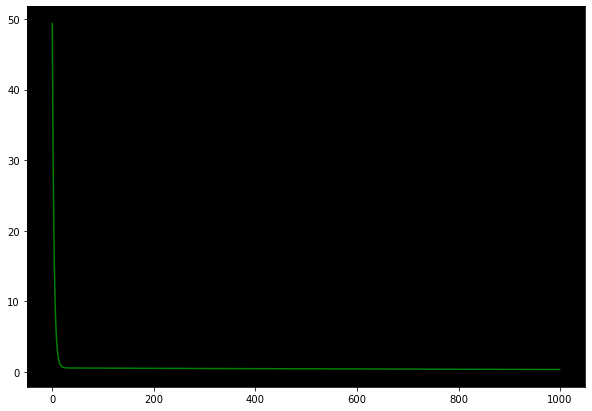

In [16]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstCost, c = "g")

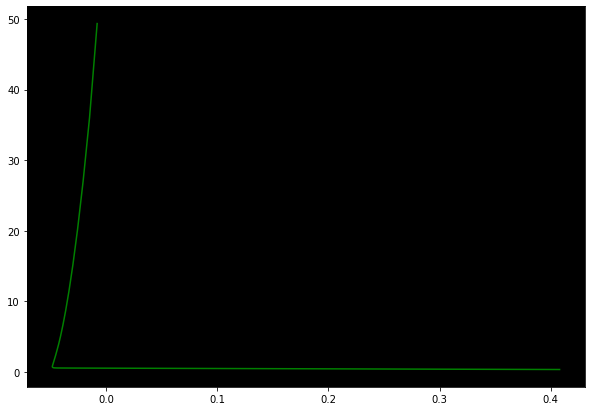

In [17]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta0,lstCost, c = "g")

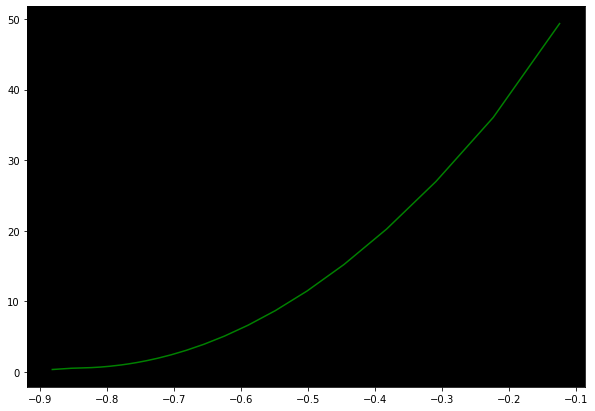

In [18]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta1,lstCost, c = "g")

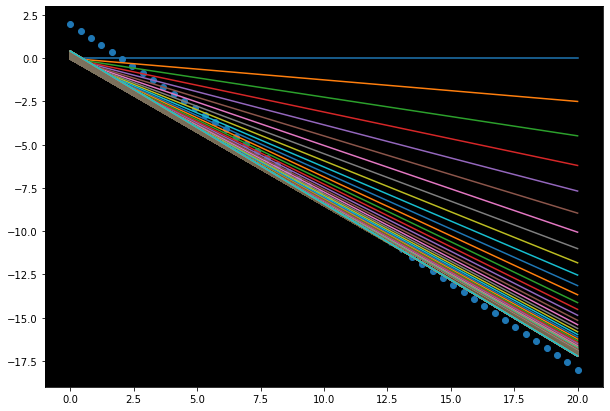

In [19]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)
for i in range(len(lstPredicted_Data)):
    plt.plot(x, lstPredicted_Data[i])

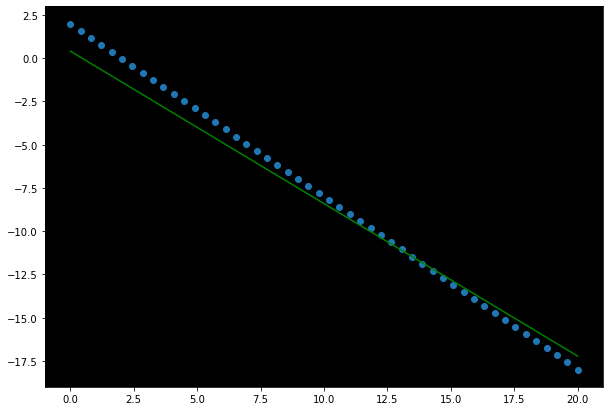

In [20]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)
plt.plot(x, lstPredicted_Data[-1],c = "g")

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [21]:
lstTheta0,lstTheta1 ,lstCost,lstPredicted_Data = MomentumBasedGradientDecentSingleNew(x,y,mom=.0001,learningRate=.00002)

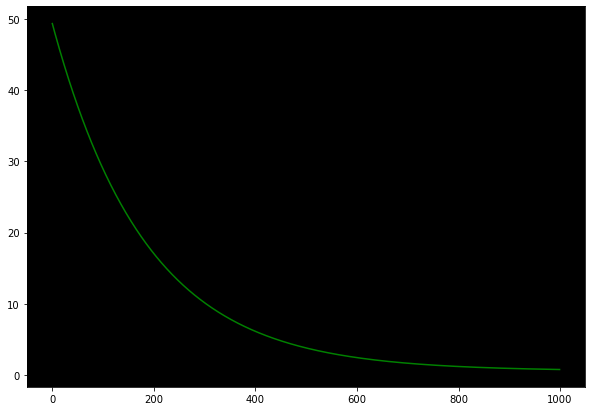

In [22]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstCost, c = "g")

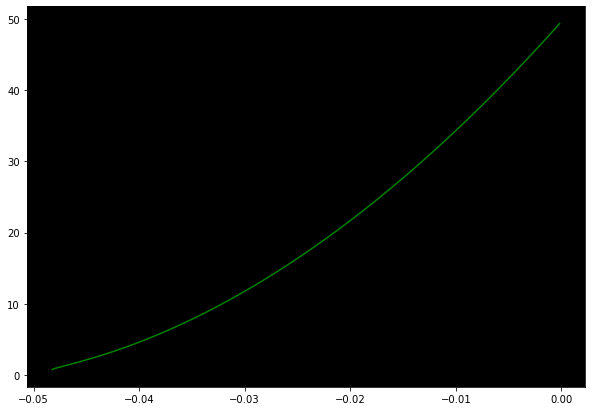

In [23]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta0,lstCost, c = "g")

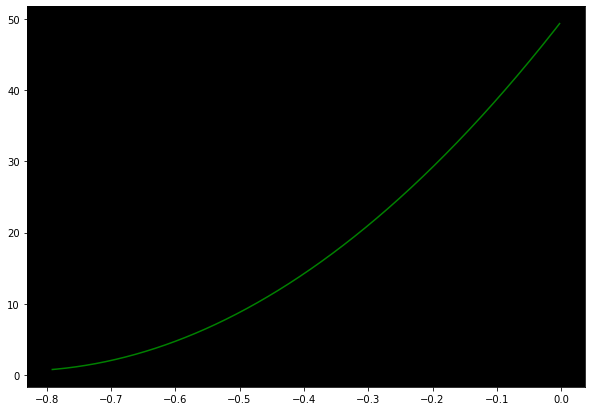

In [24]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta1,lstCost, c = "g")

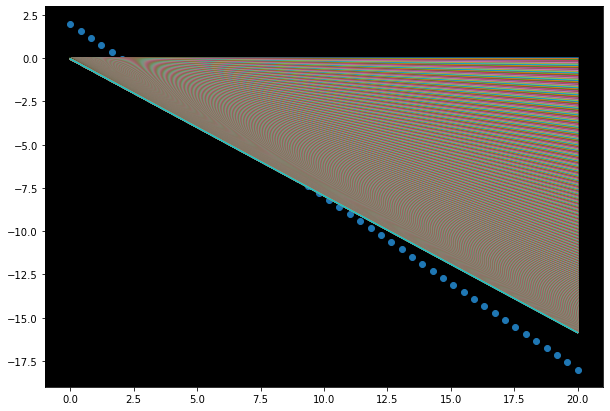

In [25]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)
for i in range(len(lstPredicted_Data)):
    plt.plot(x, lstPredicted_Data[i])

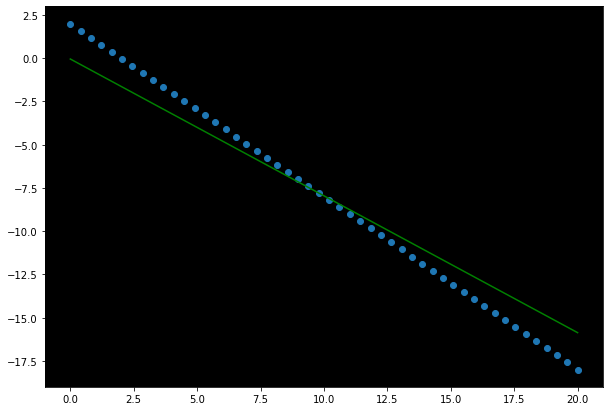

In [26]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)
plt.plot(x, lstPredicted_Data[-1],c = "g")

### Update your Batch GD for one variable  implementation to be NAG and check your results

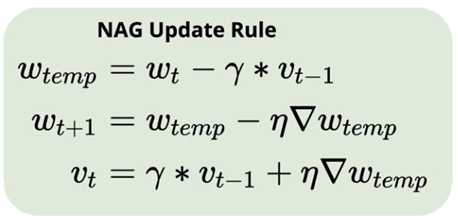

# 3 - Nestrov Accelerated Gradient Decent

In [27]:
def NAGradientDecentSingleNew(x, y,mom =.01, learningRate = .001, n_iter = 1000):
    lstCost = []
    lstTheta0 = []
    lstTheta1 = []
    lstPredicted_Data = []
    
    lstcostAfterTemp = []
    
    theta_0 = 0
    theta_1 = 0
    vt0 = 0
    vt1 = 1
    
    for i in range(n_iter):  
        predicted_data = (theta_0- vt0) + (theta_1 - vt1) *x
        
        cost = 1/(2*len(x)) * sum((predicted_data - y)**2)
        
        grad_theta_0 = (1/len(x)) * sum(predicted_data - y)
        grad_theta_1 = (1/len(x)) * sum((predicted_data - y)*x)
        
        theta_0 = theta_0 - learningRate * grad_theta_0
        theta_1 = theta_1 - learningRate * grad_theta_1
        
        vt0 = mom * vt0 + learningRate * grad_theta_0
        vt1 = mom * vt1 + learningRate * grad_theta_1 
             
        #print(vt0)
        #print(vt1)
        
        lstcostAfterTemp.append(1/(2*len(x)) * sum(((theta_0 + theta_1 *x) - y)**2))
        
        
        
        lstPredicted_Data.append(predicted_data)
        lstCost.append(cost)
        lstTheta0.append(theta_0)
        lstTheta1.append(theta_1)

    return lstTheta0,lstTheta1 ,lstCost,lstPredicted_Data,lstcostAfterTemp

In [28]:
lstTheta0,lstTheta1 ,lstCost,lstPredicted_Data, newLosts = NAGradientDecentSingleNew(x,y,mom=.5,learningRate=.00002)

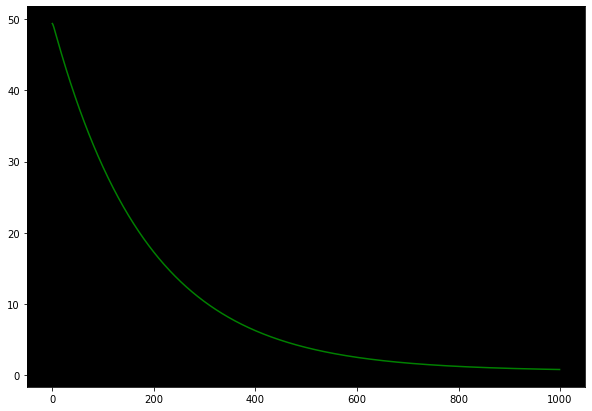

In [29]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(newLosts, c = "g")

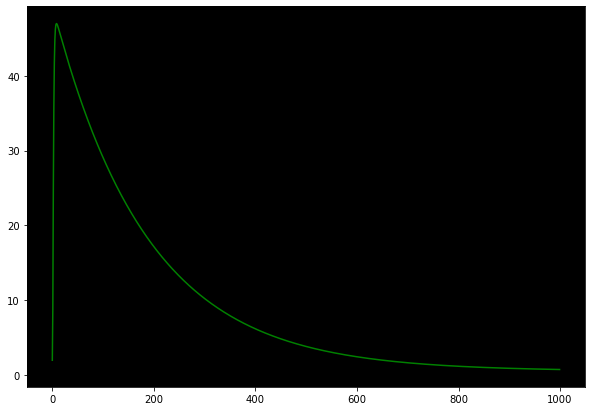

In [30]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstCost, c = "g")

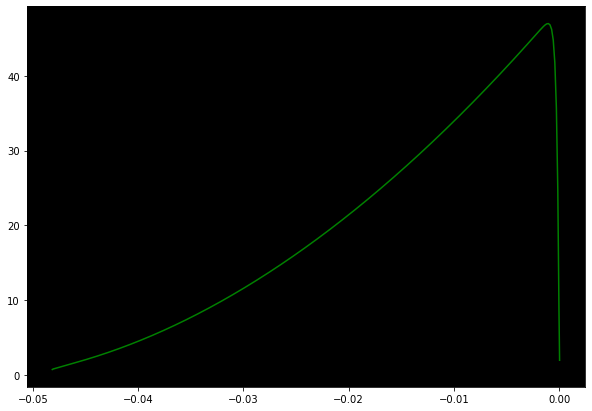

In [31]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta0,lstCost, c = "g")

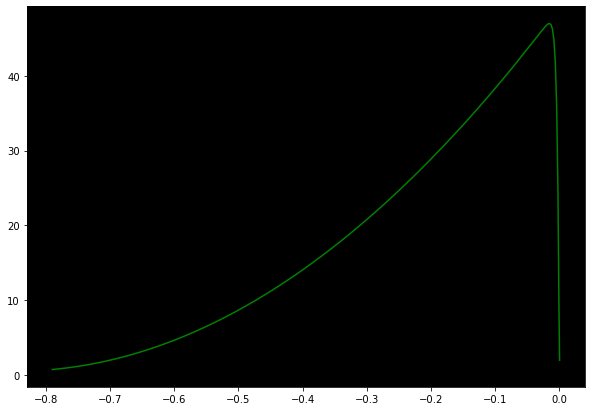

In [32]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.plot(lstTheta1,lstCost, c = "g")

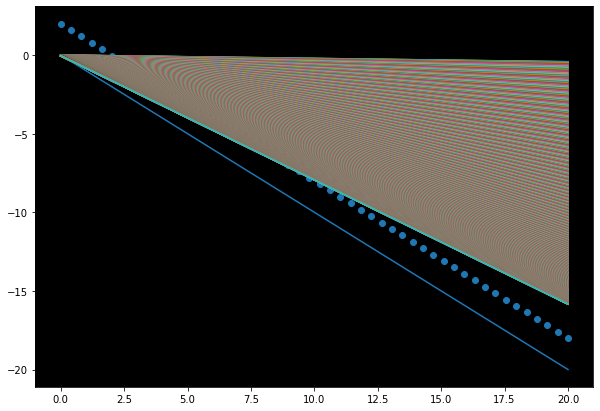

In [33]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)
for i in range(len(lstPredicted_Data)):
    plt.plot(x, lstPredicted_Data[i])

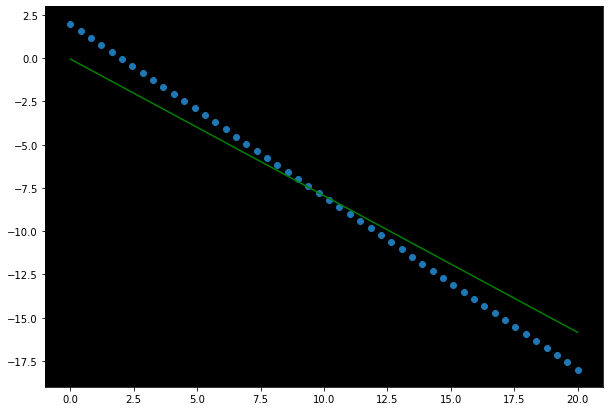

In [34]:
plt.figure(figsize=(10,7))
ax = plt.axes()
ax.set_facecolor("black")
plt.scatter(x,y)
plt.plot(x, lstPredicted_Data[-1],c ="g")

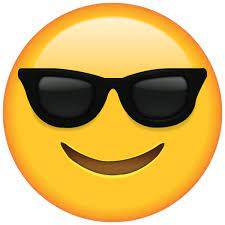